# Predicting Heart Disease using Machine Learning

> If we reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project

In [2]:
#Import all tools we need

#Plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [3]:
df=pd.read_csv('heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df.shape

(303, 14)

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
# Find out how many of each class there are
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

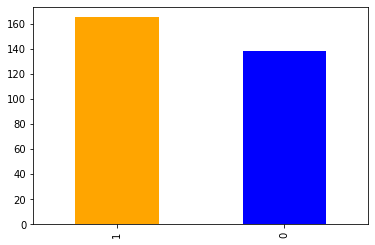

In [10]:
 df["target"].value_counts().plot(kind='bar', color=['orange','blue']);

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease frequency according to sex

In [14]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [15]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

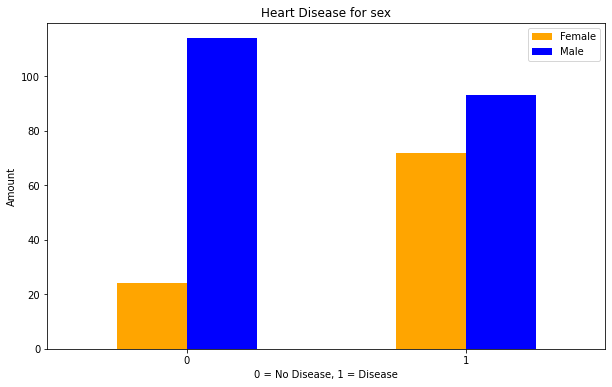

In [19]:
 # Plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6),color=['orange','blue']); 
plt.title('Heart Disease for sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male']);
plt.xticks(rotation=0)

### Age VS Max. heart rate for heart disease

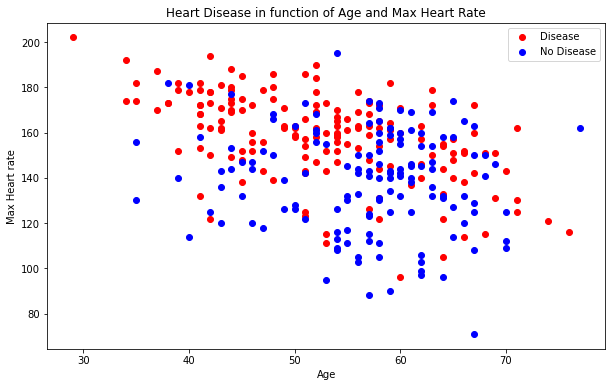

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='red');
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='blue');

#Add some info
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart rate')
plt.legend(["Disease", "No Disease"]);

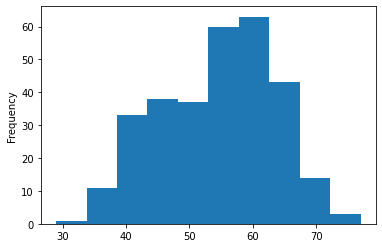

In [23]:
# Check yhe distribution of age column with the histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest pain type

In [24]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


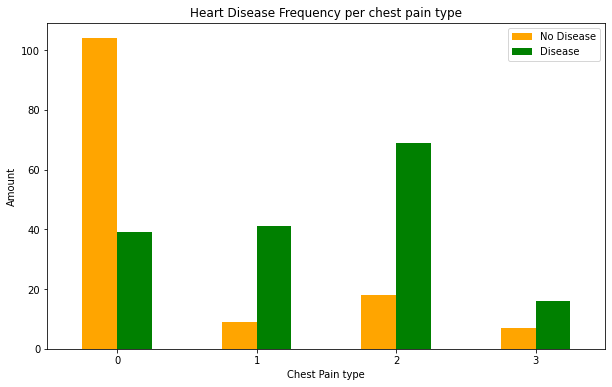

In [27]:
# Make crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind='bar',figsize=(10,6),color=['orange','green'])

plt.title('Heart Disease Frequency per chest pain type')
plt.xlabel('Chest Pain type')
plt.ylabel('Amount')
plt.legend(['No Disease','Disease'])
plt.xticks(rotation=0);

In [28]:
#Make correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


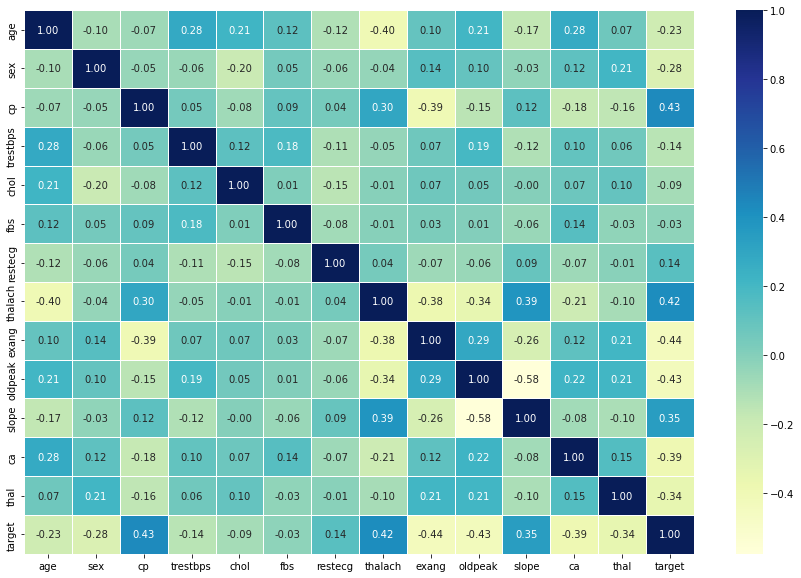

In [32]:
#Make correlation matrix prettier
corr_matrix=df.corr()
fig, ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu");

## Modelling

In [33]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [34]:
X=df.drop('target', axis=1)
y=df['target']

In [35]:
np.random.seed(23)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [36]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1


In [37]:
y_train.head()

131    1
117    1
193    0
8      1
5      1
Name: target, dtype: int64

In [40]:
#Put models in a dictionary
models={"Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}

#Function to score and fit models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(23)
    model_scores={}
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test, y_test)
    return model_scores

In [41]:
model_scores=fit_and_score(models=models,
                          X_train=X_train,
                          X_test=X_test,
                          y_train=y_train,
                          y_test=y_test)
model_scores

C:\sample_project\heart-disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.819672131147541,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.8032786885245902}

### Model Comparison

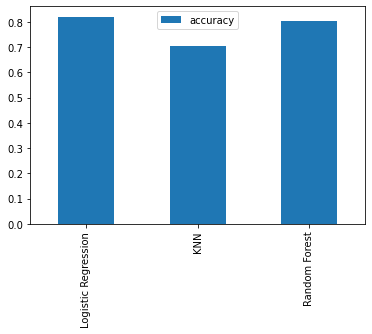

In [42]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

### Hyperparameter Tuning 

In [44]:
#Tune KNN
train_scores=[]
test_scores=[]
neighbors=range(1,21)
knn=KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [45]:
train_scores

[1.0,
 0.7892561983471075,
 0.7768595041322314,
 0.731404958677686,
 0.7768595041322314,
 0.7355371900826446,
 0.7355371900826446,
 0.71900826446281,
 0.71900826446281,
 0.6900826446280992,
 0.6776859504132231,
 0.6776859504132231,
 0.6859504132231405,
 0.6942148760330579,
 0.6528925619834711,
 0.6652892561983471,
 0.6694214876033058,
 0.6570247933884298,
 0.6652892561983471,
 0.6859504132231405]

In [46]:
test_scores

[0.6557377049180327,
 0.6229508196721312,
 0.7377049180327869,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.7540983606557377,
 0.7049180327868853,
 0.7377049180327869,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7377049180327869,
 0.7049180327868853,
 0.7213114754098361,
 0.7377049180327869,
 0.7540983606557377]

Maximum KNN Score on test data: 75.41%


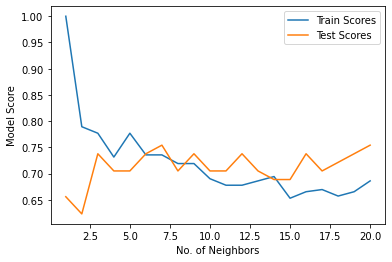

In [47]:
plt.plot(neighbors,train_scores,label="Train Scores")
plt.plot(neighbors,test_scores,label="Test Scores")
plt.xlabel('No. of Neighbors')
plt.ylabel('Model Score')
plt.legend()
print(f"Maximum KNN Score on test data: {max(test_scores)*100:.2f}%")

## SINCE BY TUNING KNN, WE DIDN'T GET HIGHER SCORE THAN OTHER MODELS, SO WE DISCARD KNN MODEL 

### Hyperparameter tuning with RandomizedSearch CV

In [70]:
# Tune Logistic Regression and Random Forest Classifier

# Create hyperparameter grid for Logistic Regression
log_reg_grid={"C": np.logspace(-4,4,20),
              "solver": ["liblinear"]}

# Create hyperparameter grid for Random Forest Classifier
rf_grid={"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

#### LOGISTIC REGRESSION

In [71]:
np.random.seed(23)
rs_log_reg=RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [83]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [84]:
rs_log_reg.score(X_test, y_test)

0.819672131147541

#### RANDOM FOREST CLASSIFIER

In [85]:
np.random.seed(23)
rs_rf=RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [89]:
rs_rf.best_params_

{'n_estimators': 760,
 'min_samples_split': 6,
 'min_samples_leaf': 7,
 'max_depth': None}

In [90]:
rs_rf.score(X_test, y_test)

0.8032786885245902

### Hyperparameter tuning with GridSearchCV


Since our Logistic Regression model provide best scores so far, we'll try and improve them again using GridSearchCV

In [91]:
log_reg_grid = {"C" : np.logspace(-4,4,30),
                "solver" : ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [92]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [93]:
gs_log_reg.score(X_test, y_test)

0.819672131147541

In [94]:
model_scores

{'Logistic Regression': 0.819672131147541,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.8032786885245902}

### Evaluating out tuned machine learning classifier, beyond accuracy

* ROC Curve & AUC Score
* Confusion matrix
* Classification Report
* Precision
* Recall
* F1-Score

To make predictions and evaluate our trained model, first we need to make predictions.

In [95]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [96]:
y_test

231    0
46     1
2      1
272    0
243    0
      ..
59     1
19     1
296    0
64     1
45     1
Name: target, Length: 61, dtype: int64

C:\sample_project\heart-disease\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


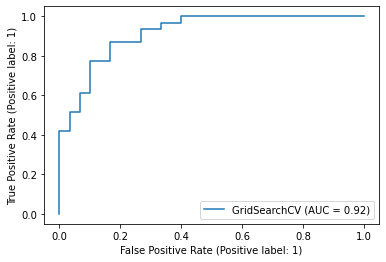

In [97]:
plot_roc_curve(gs_log_reg, X_test, y_test);

In [98]:
print(confusion_matrix(y_test,y_preds))

[[23  7]
 [ 4 27]]


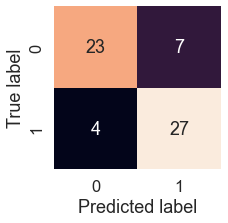

In [99]:
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

In [100]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        30
           1       0.79      0.87      0.83        31

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



### Calculate evaluation metrics using cross validation

In [102]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [103]:
clf=LogisticRegression(C=1.3738237958832638, solver="liblinear")

In [104]:
cv_acc=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.8215300546448088

In [105]:
cv_precision=cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.817900063251107

In [106]:
cv_recall=cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.8727272727272727

In [107]:
cv_f1=cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8431741323998502

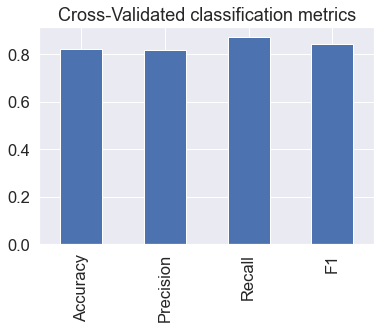

In [110]:
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                           "Precision" : cv_precision,
                           "Recall" : cv_recall,
                           "F1" : cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated classification metrics", legend=False);

## FEATURE IMPORTANCE

In [112]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [113]:
clf=LogisticRegression(C=1.3738237958832638, solver="liblinear")
clf.fit(X_train, y_train);

In [114]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.02797528710702922,
 'sex': -1.391582721507589,
 'cp': 0.8515969249662314,
 'trestbps': -0.023811461214899673,
 'chol': -0.004268931310284565,
 'fbs': 0.08772035798941707,
 'restecg': 0.46467538897173993,
 'thalach': 0.03278513710810363,
 'exang': -0.7848960206547734,
 'oldpeak': -0.42545071120068406,
 'slope': 0.3720428964389343,
 'ca': -0.8899858256684252,
 'thal': -0.8715152625882168}

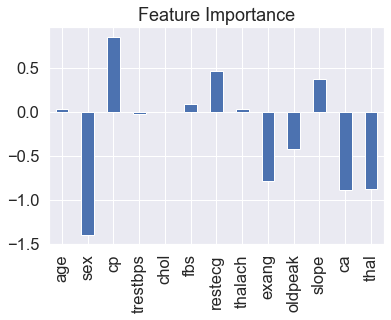

In [115]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);